In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [2]:
# Derivada simétrica, como aproximação numérica
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [3]:
# Métodos de Cauchy, ponto médio e simpson.
# Nomes: cauchy, midpoint, simpson
# Forma: (f,a,b,n=100)

# YOUR CODE HERE

def cauchy(f,a,b,n=100):
    """Calcula uma aproximação da integral de $f$ no intervalo $[a,b]$, com $n$ pontos pela fórmula de Cauchy."""
    h = (b-a)/n
    s = np.array([f(a+k*h) * (h) for k in range(n)])
    return np.sum(s)

def midpoint(f,a,b,n=100):
    h = (b-a)/n
    x = np.linspace(a+h/2, b-h/2,n)
    s = np.array([f((a+h/2)+k*h)*h for k in range(0,n-1)])
    return np.sum(s)

def simpson(f,a,b,n=100):
    h = (b-a)/n
    x = np.linspace(a+h/2, b-h/2,n)
    s = np.array([(1/3)*(f(b)/2+2*f((a+h/2)+k*h)+f(a)/2)*h for k in range(0,n-1)])
    return np.sum(s)
    

methods = [cauchy, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

## Questão 1: A função e sua primitiva

Vamos calcular o valor da integral de duas formas: pelo TFC, usando a primitiva, obtemos um valor (quase) exato.
Este valor servirá para comparar com as respostas dos métodos de aproximação (Cauchy, Ponto Médio e Simpson).

In [4]:
f = np.abs

Dê uma primitiva de $f$.

In [5]:
def F(x):
    """Primitiva de x -> |x|.  Vetorizada em x."""
    if type(x) == float or type(x) == int:
        if x < 0:
            primtv = -1*x**2/2
        else:
            primtv = x**2/2
    else:
        primtv = np.array([-1*x**2/2 if x < 0 else 1*x**2/2 for x in x]) 
    return primtv

#### Testando que a sua primitiva parece uma primitiva

In [6]:
assert np.abs(df(F,1) - 1) < 1e-12

In [7]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [8]:
## Esta caixa depende de F ser vetorizada.
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil: o erro já é bem maior...

In [15]:
df(F,0)

3.814697265625e-06

## Questão 2: Integrando em $[0,1]$

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$, conforme o número $n$ de divisões aumenta?

Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos

    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda

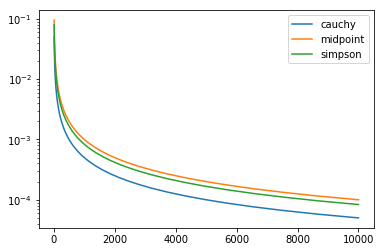

In [11]:
ax = None
ans = F(1) - F(0)
ns = np.logspace(1,4,dtype=int)
for m in methods:
    x = np.array([m(f,0,1,ns[i]) for i in range(len(ns))])
    plt.semilogy(ns,ans-x,label=m.__name__)

plt.legend()
ax = plt.gca()
plt.show()

In [12]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

Dê a ordem do método de Cauchy para esta função neste intervalo

A ordem de um método é o expoente $d$ tal que o erro de integração $e_n$ (com $n$ subdivisões) decai em função de $n$ como $\text{Const}/n^d$.

In [13]:
# Forma da resposta: decay_speed = n
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [18]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = cauchy(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = cauchy(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

NameError: name 'decay_speed' is not defined

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

YOUR ANSWER HERE

## Questão 3: Mudando o intervalo de integração

Vamos fazer vários gráficos, então para evitar fazer muito _copy-paste_
vamos definir uma função que faz sempre "o mesmo tipo de gráfico".

In [19]:
# Faça aqui uma função genérica para "fazer gráficos de erro"
# Ela pode ser adaptada do código que você fez para a questão 2.
def graph_err(f,a,b,ans):
    """ Gráficos de erro de integração da função $f$ no intervalo $[a,b]$
    - em função do número de subdivisões;
    - para os três métodos cauchy, midpoint e simpson.
    
    A resposta teórica (para poder calcular o erro!) é dada em `ans`."""
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        x = np.array([m(f,a,b,ns[i]) for i in range(len(ns))])
        plt.semilogx(ns,ans-x,label=m.__name__)
    plt.legend()

### 3.1: $I = [-1,2]$

Gráfico do erro numérico para a integral de $f$ no intervalo $[-1,2]$.

Qual a melhor escala para ver este gráfico?  Use o gráfico para escolher entre `plot`, `semilogx`, `semilogy` e `loglog` na sua função `graph_err()` acima!

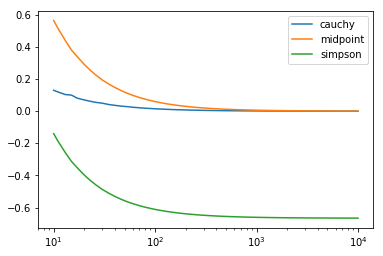

In [20]:
ax = None
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
ax = plt.gca()
plt.show()

In [21]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

YOUR ANSWER HERE

### 3.2 $I = [-1,1]$

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

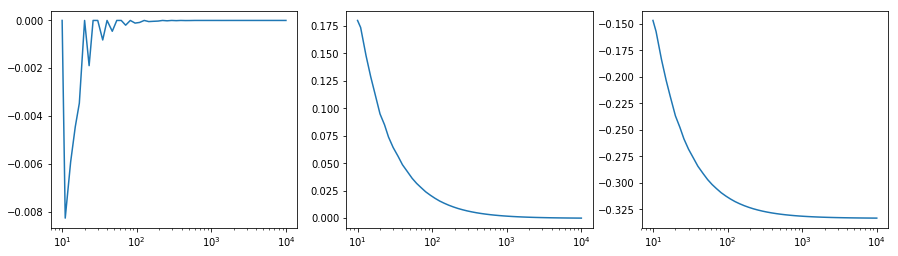

In [22]:
ans = F(1) - F(-1)
ns = np.logspace(1,4,dtype=int)
_, ax = plt.subplots(ncols=3, figsize=(15,4))
for m,a in zip(methods,ax):
    x = np.array([m(f,-1,1,ns[i]) for i in range(len(ns))])
    a.semilogx(ns,ans-x,label=m.__name__)
plt.show()

O que aconteceu agora?
Porquê?

> São gerados valores negativos como resultado, e portanto não podemos aplicar `semilogy`

### 3.3 $I = \text{random}$.

Enfim, estude intervalos "aleatórios"!

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

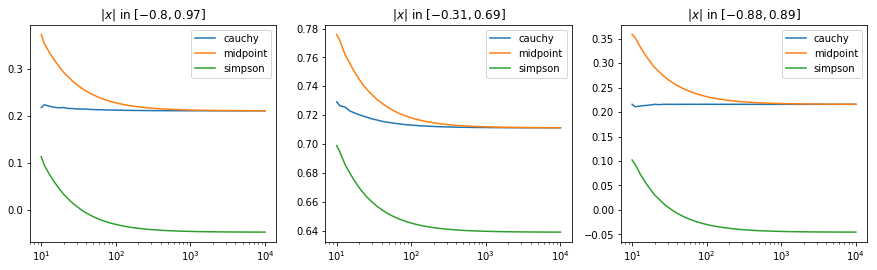

In [23]:
_, ax = plt.subplots(ncols=3, figsize=(15,4))
for axi in ax:
    # Três intervalos aleatórios! (porque pedimos 3 subgráficos acima)
    a,b = -np.random.rand(), np.random.rand()
    axi.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
    plt.sca(axi) # Para a graph_err usar o eixo certo
    # YOUR CODE HERE
    graph_err(f,a,b,ans)
plt.show()

Estes resultados são mais fáceis ou mais difíceis de interpretar?
Porquê?

> Mais fáceis, pois não houveram valores negativos que desestabilizam o gráfico do erro

# Parte 2: Uma função descontínua

In [24]:
def f(x):
    return np.cos(x)*np.sign(x)

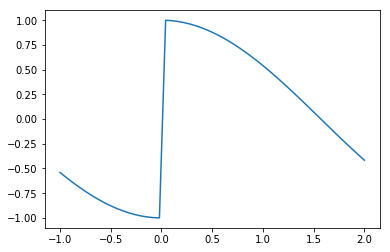

In [25]:
ts = np.linspace(-1,2)
plt.plot(ts, f(ts))
plt.show()

## Questão 4:

De novo, dê uma primitiva de $f$

In [26]:
def F(x):
    if type(x) == float or type(x) == int:
        if x < 0:
            primtv = -np.sin(x)
        else:
            primtv = np.sin(x)
    else:
        primtv = np.array([-np.sin(x) if x < 0 else np.sin(x) for x in x]) 
    return primtv

In [27]:
assert np.abs(df(F,1) - f(1)) < 1e-12

In [28]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 5: Gráficos de erro

Aqui a graph_err vai ajudar bastante!

Comece com o intervalo $[-1,1]$:

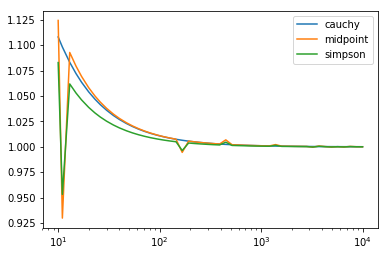

In [29]:
a,b = -1,1
# YOUR CODE HERE
graph_err(f,a,b,ans)
plt.show()

E agora $[-1,2]$:

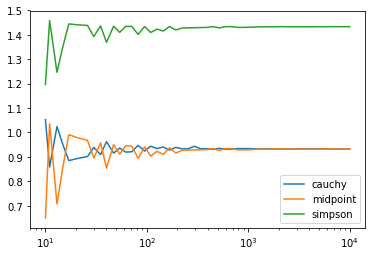

In [30]:
a,b = -1,2
# YOUR CODE HERE
graph_err(f,a,b,ans)
plt.show()

E um intervalo aleatório

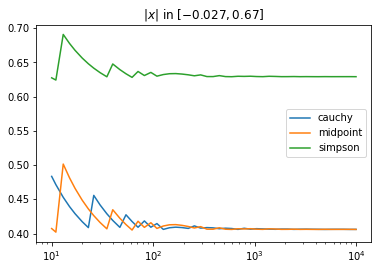

In [31]:
a,b = -np.random.rand(), np.random.rand()
plt.title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
# YOUR CODE HERE
graph_err(f,a,b,ans)
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?

YOUR ANSWER HERE